<a href="https://colab.research.google.com/github/sudhakarmlal/EVA/blob/master/Assignment12/EVA_Assgnmnt_12_cifar10_OnefitCycle_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objectives

- Refer to this code: https://mc.ai/tutorial-2-94-accuracy-on-cifar10-in-2-minutes/ (Links to an external site.)
- Refer to this code, don't try and replicate. 
- Remove any references to fw or fenwicks
- You can import OneCycleLR from this link: https://github.com/titu1994/keras-one-cycle (Links to an external site.)
- Try and match the result

In [0]:
!pip list | grep tensorflow

mesh-tensorflow          0.0.5                
tensorflow               1.14.0               
tensorflow-estimator     1.14.0               
tensorflow-hub           0.5.0                
tensorflow-metadata      0.14.0               
tensorflow-probability   0.7.0                


## Loading prerequisite libraries

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras import regularizers
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import GlobalMaxPooling2D


from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

from keras.layers.merge import concatenate
# import cropping	
from keras.layers.convolutional import Cropping2D

In [0]:
pip install git+https://github.com/jph00/fastsql


  Cloning https://github.com/jph00/fastsql to /tmp/pip-req-build-xm2m3trn
  Running command git clone -q https://github.com/jph00/fastsql /tmp/pip-req-build-xm2m3trn
ERROR: Command "python setup.py egg_info" failed with error code 1 in /tmp/pip-req-build-xm2m3trn/


In [0]:
!ls -ltr

total 16
drwxr-xr-x 1 root root 4096 Jul 19 16:14 sample_data
drwxr-xr-x 6 root root 4096 Jul 26 11:10 keras-one-cycle
drwxr-xr-x 4 root root 4096 Jul 26 11:11 cutout-random-erasing
drwx------ 3 root root 4096 Jul 26 11:12 gdrive


In [0]:
!rm -rf keras-one-cycle

In [0]:
# !pip install keras-one-cycle
# !git clone https://github.com/titu1994/keras-one-cycle.git
# !ls -ltr
# !pwd

# import os
# os.chdir('/content/keras-one-cycle')

!git clone https://github.com/amitkayal/keras-one-cycle.git
!ls -ltr
!pwd

import os

Cloning into 'keras-one-cycle'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 238 (delta 18), reused 0 (delta 0), pack-reused 208
Receiving objects: 100% (238/238), 3.19 MiB | 2.82 MiB/s, done.
Resolving deltas: 100% (100/100), done.
total 16
drwxr-xr-x 1 root root 4096 Jul 19 16:14 sample_data
drwxr-xr-x 4 root root 4096 Jul 26 11:11 cutout-random-erasing
drwx------ 3 root root 4096 Jul 26 11:12 gdrive
drwxr-xr-x 5 root root 4096 Jul 26 12:56 keras-one-cycle
/content


In [0]:
os.chdir('/content/keras-one-cycle/')
!pwd

from clr import LRFinder
from clr import OneCycleLR

os.chdir('/content/')
!pwd

/content/keras-one-cycle
/content


In [0]:
from keras import initializers
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import LSTM, Input, TimeDistributed,Convolution2D,Activation
from keras.layers.convolutional import ZeroPadding2D
from keras.optimizers import RMSprop, SGD
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import optimizers
from keras.preprocessing import sequence
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import load_model

from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from keras.callbacks import *
from keras.utils import np_utils
from keras.models import load_model
from keras import regularizers
import cv2
from keras import initializers, regularizers
from keras.layers import Lambda

from keras.layers import Concatenate
from keras.layers import advanced_activations
from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils.np_utils import to_categorical
from keras.optimizers import SGD
from matplotlib import pyplot as plt   
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import load_model
from keras import regularizers
import cv2
#FinalModel.add(modelNew)
from keras import regularizers
from keras import layers

# Import the backend

from keras.layers import Concatenate
from keras.layers import advanced_activations


import os
from keras.callbacks import *
from sklearn.model_selection import train_test_split
###
import glob
import matplotlib.pyplot as plt
import random
import scipy.ndimage
import tensorflow as tf

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
import zipfile
import shutil
import linecache
import os
import sys
from tqdm import tqdm
import random

from collections import Counter
from six.moves.urllib.request import urlretrieve

from IPython.core.interactiveshell import InteractiveShell
# pretty print all cell's output and not just the last one
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import preprocessing
from keras.preprocessing.image import ImageDataGenerator
import datetime
import pandas as pd

In [0]:
!pip install easycolab
import easycolab as ec


## Loading cifar10 dataset

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_rows, img_cols,img_channels =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-26 12:57:06.894686


In [0]:
print (num_classes)
print (num_train)
print (train_features.shape)

10
50000
(50000, 32, 32, 3)


## Installing cutout library and view some images

In [0]:
os.chdir('/content')
!git clone https://github.com/yu4u/cutout-random-erasing.git
!ls -ltr
!pwd
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

fatal: destination path 'cutout-random-erasing' already exists and is not an empty directory.
total 16
drwxr-xr-x 1 root root 4096 Jul 19 16:14 sample_data
drwxr-xr-x 4 root root 4096 Jul 26 11:11 cutout-random-erasing
drwx------ 3 root root 4096 Jul 26 11:12 gdrive
drwxr-xr-x 5 root root 4096 Jul 26 12:56 keras-one-cycle
/content
Current time: 2019-07-26 12:57:16.217848


In [0]:
os.chdir('/content')
!pwd

/content


In [0]:
os.chdir('/content/cutout-random-erasing')
from random_eraser import get_random_eraser
os.chdir('/content')
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-26 12:57:20.673712


## Understanding Input Dataset

Text(0.5, 1.0, 'airplane')

Text(0.5, 1.0, 'automobile')

Text(0.5, 1.0, 'bird')

Text(0.5, 1.0, 'cat')

Text(0.5, 1.0, 'deer')

Text(0.5, 1.0, 'dog')

Text(0.5, 1.0, 'frog')

Text(0.5, 1.0, 'horse')

Text(0.5, 1.0, 'ship')

Text(0.5, 1.0, 'truck')

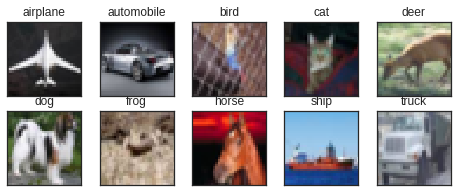

Current time: 2019-07-26 12:57:21.449741


In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

## Required Methods

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-26 12:57:21.514973


In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)
  
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-26 12:57:21.536243


In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-26 12:57:21.578328


In [0]:
from sklearn.metrics import accuracy_score #works
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# import for showing the confusion matrix
import itertools


def show_classification_matrix(Y_pred,test_labels):
  # Convert predictions classes to one hot vectors 
  Y_pred_classes = np.argmax(Y_pred,axis = 1)
  # Convert validation observations to one hot vectors
  Y_true = np.argmax(test_labels,axis = 1) 
  # # compute the confusion matrix
  print("Confusion matrix:\n%s" % confusion_matrix(y_true=Y_true, y_pred=Y_pred_classes))
  # compute the confusion matrix
  confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
  return confusion_mtx


In [0]:
def show_misclassified_images(Y_pred,Y_true_nor,X_test):
  
  class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

  # print(score)
  # Convert validation observations to one hot vectors
  Y_true = np.argmax(Y_true_nor,axis = 1) 
  # Convert predictions classes to one hot vectors 
  Y_pred_classes = np.argmax(Y_pred,axis = 1) 
  # Errors are difference between predicted labels and true labels
  errors = (Y_pred_classes - Y_true != 0)
  errors
  Y_pred_classes_errors = Y_pred_classes[errors]
  pred_errors = Y_pred_classes_errors
  Y_pred_errors = Y_pred[errors]
  Y_true_errors = Y_true[errors]
  obs_errors = Y_true_errors
  
  X_test_errors = X_test[errors]
  img_errors = X_test_errors
  # Probabilities of the wrong predicted numbers
  Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)
  # Predicted probabilities of the true values in the error set
  true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))
  # Difference between the probability of the predicted label and the true label
  delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors
  # Sorted list of the delta prob errors
  sorted_dela_errors = np.argsort(delta_pred_true_errors)
  most_important_errors = sorted_dela_errors[-30:]
  errors_index = most_important_errors
  """ This function shows 6 images with their predicted and real labels"""
#   n = 0
#   nrows = 2
#   ncols = 3
  n = 0
  nrows = 6
  ncols = 5
 
  fig, ax = plt.subplots(nrows,ncols,figsize=(22, 22), sharex=True,sharey=True)
  for row in range(nrows):
    for col in range(ncols):
      error = errors_index[n]
#             print('\n')
#       ax[row,col].imshow((img_errors[error]).reshape((32,32)))
      ax[row,col].imshow((img_errors[error]))
      ax[row,col].set_title("Pred :{}\nTrue :{}".format(class_names[pred_errors[error]],class_names[obs_errors[error]]))
#             print('\n') 
      n += 1
#             print("value:",n)
  # If you don't do tight_layout() you'll have weird overlaps
  plt.tight_layout()
  
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-26 12:57:21.659846


In [0]:


from keras.layers.core import Dense, Lambda
from keras import regularizers
from keras.layers.merge import concatenate


def __grouped_convolution_block(input, filters=64, cardinality=8, strides=1, weight_decay=5e-4,dilation_rate=(1, 1), filter_size =3):
    ''' Adds a grouped convolution block. It is an equivalent block from the paper
    Args:
        input: input tensor
        grouped_channels: grouped number of filters
        cardinality: cardinality factor describing the number of groups
        strides: performs strided convolution for downscaling if > 1
        weight_decay: weight decay term
    Returns: a keras tensor
    '''
    grouped_channels = int(filters / cardinality)
    init = input
    channel_axis = 1 if K.image_data_format() == 'channels_first' else -1
    if filter_size ==3:
      
      group_list = []

      if cardinality == 1:
        # with cardinality 1, it is a standard convolution
        x = Conv2D(grouped_channels, (3, 3), padding='same', use_bias=False, strides=(strides, strides),
                   dilation_rate=dilation_rate,kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(weight_decay))(init)
        x = BatchNormalization(axis=channel_axis)(x)
        x = Activation('relu')(x)
        return x

      for c in range(cardinality):
        x = Lambda(lambda z: z[:, :, :, c * grouped_channels:(c + 1) * grouped_channels]
        if K.image_data_format() == 'channels_last' else
        lambda z: z[:, c * grouped_channels:(c + 1) * grouped_channels, :, :])(input)

        x = Conv2D(grouped_channels, (3, 3), padding='same', use_bias=False, strides=(strides, strides),
                   dilation_rate=dilation_rate,kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(weight_decay))(x)

        group_list.append(x)

      group_merge = concatenate(group_list, axis=channel_axis)
      x = BatchNormalization(axis=channel_axis)(group_merge)
      x = Activation('relu')(x)
   
    elif filter_size==5:
           
      group_list = []

      if cardinality == 1:
        # with cardinality 1, it is a standard convolution
        x = Conv2D(grouped_channels, (5, 5), padding='same', use_bias=False, strides=(strides, strides),
                   dilation_rate=dilation_rate,kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(weight_decay))(init)
        x = BatchNormalization(axis=channel_axis)(x)
        x = Activation('relu')(x)
        return x

      for c in range(cardinality):
        x = Lambda(lambda z: z[:, :, :, c * grouped_channels:(c + 1) * grouped_channels]
        if K.image_data_format() == 'channels_last' else
        lambda z: z[:, c * grouped_channels:(c + 1) * grouped_channels, :, :])(input)

        x = Conv2D(grouped_channels, (5, 5), padding='same', use_bias=False, strides=(strides, strides),
                   dilation_rate=dilation_rate,kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(weight_decay))(x)

        group_list.append(x)

      group_merge = concatenate(group_list, axis=channel_axis)
      x = BatchNormalization(axis=channel_axis)(group_merge)
      x = Activation('relu')(x)
      
    return x



In [0]:
import operator
from PIL import Image
from PIL import ImageDraw
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

def show_misclassified_gradcam_heatmap_images(Y_pred,Y_true_nor,X_test):
  
  class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

  # print(score)
  # Convert validation observations to one hot vectors
  Y_true = np.argmax(Y_true_nor,axis = 1) 
  # Convert predictions classes to one hot vectors 
  Y_pred_classes = np.argmax(Y_pred,axis = 1) 
  # Errors are difference between predicted labels and true labels
  errors = (Y_pred_classes - Y_true != 0)
  errors
  Y_pred_classes_errors = Y_pred_classes[errors]
  pred_errors = Y_pred_classes_errors
  Y_pred_errors = Y_pred[errors]
  Y_true_errors = Y_true[errors]
  obs_errors = Y_true_errors
  
  X_test_errors = X_test[errors]
  img_errors = X_test_errors
  # Probabilities of the wrong predicted numbers
  Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)
  # Predicted probabilities of the true values in the error set
  true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))
  # Difference between the probability of the predicted label and the true label
  delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors
  # Sorted list of the delta prob errors
  sorted_dela_errors = np.argsort(delta_pred_true_errors)
  most_important_errors = sorted_dela_errors[-30:]
  errors_index = most_important_errors
  """ This function shows 6 images with their predicted and real labels"""
#   n = 0
#   nrows = 2
#   ncols = 3
  n = 0
  nrows = 6
  ncols = 5
 
  fig, ax = plt.subplots(nrows,ncols,figsize=(22, 22), sharex=True,sharey=True)
  for row in range(nrows):
    for col in range(ncols):
      error = errors_index[n]
#             print('\n')
#       ax[row,col].imshow((img_errors[error]).reshape((32,32)))
## added for gradcam
      img = np.copy(img_errors[error])
      x = np.expand_dims(img_errors[error], axis=0)
      class_idx = pred_errors[error]
      class_output =  modelmod.output[:, class_idx] ##modelCiphar.output[:, class_idx
      last_conv_layer = modelmod.get_layer("conv2d_6")
      grads = K.gradients(class_output, last_conv_layer.output)[0]
      pooled_grads = K.mean(grads, axis=(0, 1, 2))
      iterate = K.function([modelmod.input], [pooled_grads, last_conv_layer.output[0]])
      pooled_grads_value, conv_layer_output_value = iterate([x])
      for i in range(10):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
       
      heatmap = np.mean(conv_layer_output_value, axis=-1)
      heatmap = np.maximum(heatmap, 0)
      heatmap /= np.max(heatmap)
      heatmap = cv2.resize(heatmap, (img_errors[error].shape[1], img_errors[error].shape[0]))
      heatmap = np.uint8(255 * heatmap)

      heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
      heatmap = heatmap/255
      
      for i in range(len(heatmap)):
        for j in range(len(heatmap[0])):
          if heatmap[i][j][1]<=0.01 and heatmap[i][j][2]<=0.01:
            heatmap[i][j] = 0
        
#       result = Image.blend(img_errors[error], heatmap, alpha=0.5)
      superimposed_img = 0.5*(img_errors[error]) + 0.5*heatmap
      ax[row,col].imshow((superimposed_img))
  ## end of addition for gradcam
#       ax[row,col].imshow((img_errors[error]))
      ax[row,col].set_title("Pred :{}\nTrue :{}".format(class_names[pred_errors[error]],class_names[obs_errors[error]]))
#             print('\n') 
      n += 1
#             print("value:",n)
  # If you don't do tight_layout() you'll have weird overlaps
  plt.tight_layout()

Current time: 2019-07-26 12:57:21.767034


## Data Preprocessing

In [0]:
# preprocess input
mean = np.mean(train_features, axis=(0, 1, 2), keepdims=True).astype('float32')
std = np.mean(train_features, axis=(0, 1, 2), keepdims=True).astype('float32')
print("Channel Mean before Normalisation : ", mean)
print("Channel Std before Normalisation : ", std)

Channel Mean before Normalisation :  [[[[125.306915 122.95039  113.86539 ]]]]
Channel Std before Normalisation :  [[[[125.306915 122.95039  113.86539 ]]]]


In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

currentDT = datetime.datetime.now()
print("Current time:", currentDT)


Current time: 2019-07-26 12:57:22.519907


In [0]:
# preprocess input
mean = np.mean(train_features, axis=(0, 1, 2), keepdims=True).astype('float32')
std = np.mean(train_features, axis=(0, 1, 2), keepdims=True).astype('float32')
print("Channel Mean after Normalisation: ", mean)
print("Channel Std after Normalisation: ", std)

currentDT = datetime.datetime.now()
print("Current time:", currentDT)


Channel Mean after Normalisation:  [[[[0.4914009  0.48215896 0.4465308 ]]]]
Channel Std after Normalisation:  [[[[0.4914009  0.48215896 0.4465308 ]]]]
Current time: 2019-07-26 12:57:22.721998


In [0]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

pixel_level = False

Customdatagen = ImageDataGenerator(
    horizontal_flip=False,
    zoom_range=0.1,
    preprocessing_function=get_random_eraser(p=0.5, s_l=0.02, s_h=0.5, pixel_level=pixel_level)
)
currentDT = datetime.datetime.now()
print("Current time:", currentDT)


Current time: 2019-07-26 12:57:22.761518


/usr/local/lib/python3.6/dist-packages/keras/preprocessing/image.py:440: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  image.ImageDataGenerator.__init__).args:


In [0]:
train_features.mean()

0.4733649

In [0]:
Customdatagen.fit(train_features)
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-26 12:57:23.227660


In [0]:
train_features.mean()
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

0.4733649

Current time: 2019-07-26 12:57:23.334217


(-0.5, 31.5, 31.5, -0.5)

Current time: 2019-07-26 12:57:23.379554


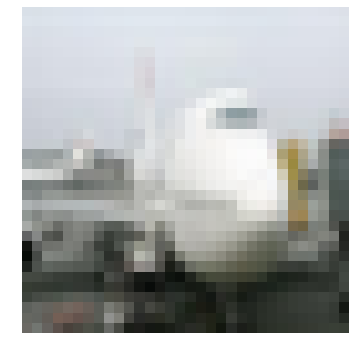

In [0]:
plt.imshow(train_features[185])
plt.axis('off')
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

W0726 12:57:23.589746 140331642771328 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 31.5, 31.5, -0.5)

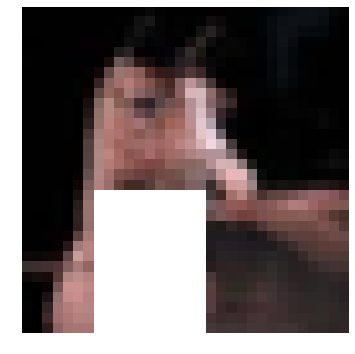

In [0]:
eraser = get_random_eraser()

plt.imshow(eraser(train_features[85]), interpolation="nearest")
plt.axis('off')

## Model Development

#### Global Variables for Models

In [0]:
batch_size = 256  ## I could not use 512 due to OOM and hence constrained to use this reduced value
nb_classes = 10
nb_epoch = 1  # Only finding lr
data_augmentation = True
num_epoch = 50

#### Model Architecture

**Key architecural decision been made in the model**
1. Using Image Normalization
2. Making use of Batch Normalization
3. Making use of L2 Regularizer
4. Properly using Dropout
5. Removed Dense layers
6. Overall reduced number of parameters from 1,172,410 to 290,090



In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Current time: 2019-07-26 12:57:23.801655


#### Original Model

**Following model is not being used and kept here for reference only**

In [0]:
# Define the model
# model1 = Sequential()
# model1.add(Convolution2D(32, 3, 3, border_mode='same',kernel_regularizer=regularizers.l2(0.0001), input_shape=(32, 32, 3)))
# model1.add(Activation('relu'))
# model1.add(BatchNormalization())

# model1.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
# model1.add(Activation('relu'))
# model1.add(BatchNormalization())

# model1.add(MaxPooling2D(pool_size=(2, 2)))
# model1.add(Dropout(0.2))

# model1.add(Convolution2D(32, 1, 1))


# model1.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
# model1.add(Activation('relu'))
# model1.add(BatchNormalization())

# model1.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
# model1.add(Activation('relu'))
# model1.add(BatchNormalization())

# model1.add(MaxPooling2D(pool_size=(2, 2)))
# model1.add(Dropout(0.3))

# model1.add(Convolution2D(32, 1, 1))


# model1.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
# model1.add(Activation('relu'))
# model1.add(BatchNormalization())

# model1.add(Convolution2D(256, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
# model1.add(Activation('relu'))
# model1.add(BatchNormalization())

# model1.add(MaxPooling2D(pool_size=(2, 2)))
# model1.add(Dropout(0.5))

# model1.add(Convolution2D(10, 1, 1))

# model1.add(AveragePooling2D(pool_size = (4,4)))
# model1.add(Flatten())


# model1.add(Activation('softmax'))

#### Modified model 

This modiifed one follows methodologies as per guidance from [Tutorial 2: 94% accuracy on Cifar10 in 2 minutes](https://mc.ai/tutorial-2-94-accuracy-on-cifar10-in-2-minutes/). I did not import the github, rather have understood the network architecture principles and have designed here.

**Salients network architecture principles as per "Tutorial 2: 94% accuracy on Cifar10 in 2 minutes"**

- 1st Network Block (***A Conv2D followed by BatchNormalization and ReLU activation.***)
  - 64 filter 3x3(stride 1) has been used with kernel_initializer='glorot_uniform', bn_mom=0.99, bn_eps=0.001 and padding='same'.
  - BatchNormalization with momentum of 0.99 and bn_eps=0.001
  - Relu activation 
  **Output Size:** 32X32
   
- 2nd Network Block(***A ConvBlk with additional residual ConvBN layers.***)

  - Level 1A 
      - 128 filter 3x3(stride 1) has been used with kernel_initializer='glorot_uniform', bn_mom=0.99, bn_eps=0.001 and padding='same'.
      - BatchNormalization(momentum=bn_mom, epsilon=bn_eps)
      - *MaxPooling2D*
      - **Output Size:** 16X16

  
   - Level 1B 
      - 128 filter 3x3(stride 1) has been used with kernel_initializer='glorot_uniform', bn_mom=0.99, bn_eps=0.001 and padding='same'.
      - BatchNormalization with momentum of 0.99 and bn_eps=0.001
      - Relu activation 
        **Output Size:** 16X16
  
   - Level 2 
     - 128 filter 3x3(stride 1) has been used with kernel_initializer='glorot_uniform', bn_mom=0.99, bn_eps=0.001 and padding='same'.
     - BatchNormalization with momentum of 0.99 and bn_eps=0.001
     - Relu activation
        **Output Size:** 16X16
  
    - Level 3
      - **Skip Connection between Output of Level1A and Output of Level2**
        **Output Size:** 16X16

   
- 3rd Network Block(***A block of ConvBN layers, followed by a pooling layer***.)

    - Level 1 
      - 256 filter 3x3(stride 1) has been used with kernel_initializer='glorot_uniform', bn_mom=0.99, bn_eps=0.001 and padding='same'.
      - BatchNormalization with momentum of 0.99 and bn_eps=0.001
      - Relu activation 
        **Output Size:** 16X16

    
   - Level 2
    - *MaxPooling2D*
      **Output Size:** 8X8


- 4th Network Block(***A ConvBlk with additional residual ConvBN layers.***)
    - Level 1A 
      - 512 filter 3x3(stride 1) has been used with kernel_initializer='glorot_uniform', bn_mom=0.99, bn_eps=0.001 and padding='same'.
      - *MaxPooling2D*
      - **Output Size:** 4X4
         
    - Level 1B 
      - 512 filter 3x3(stride 1) has been used with kernel_initializer='glorot_uniform', bn_mom=0.99, bn_eps=0.001 and padding='same'.
      -  BatchNormalization with momentum of 0.99 and bn_eps=0.001
      - Relu activation 
      - **Output Size:** 4X4
   
    - Level 2 
      - 512 filter 3x3(stride 1) has been used with kernel_initializer='glorot_uniform', bn_mom=0.99, bn_eps=0.001 and padding='same'.
      - BatchNormalization with momentum of 0.99 and bn_eps=0.001
      - Relu activation
      - **Output Size:** 4X4
    
    - Level 3
      - **Skip Connection between Output of Level1A and Output of Level2**
   
    
- 5th Network Block(***Global Max Pooling***.)
    - Level 1 
      - *Global MaxPooling2D*.

- 6th Network Block(***FC Layer***.)
    - Level 1 
      - Dense layer with neuron as same as no of classes.
    
.
    

In [0]:
# input = Input(shape=(32,32,3,))

# # 1st Network Block (A Conv2D followed by BatchNormalization and ReLU activation.)

# # 64 filter 3x3(stride 1) has been used with kernel_initializer='glorot_uniform', bn_mom=0.99, bn_eps=0.001 and padding='same'.
# # BatchNormalization with momentum of 0.99 and bn_eps=0.001
# # Relu activation
# # Output Size:* 32X32

# current_filters =64  
# kernel_size=3
# bn_mom=0.95
# bn_eps=1e-5 #0.001
# strides=(1, 1)
# pool_size= (2,2)
# kernel_size_revised =1
# n_class = 10

# modelmod = Conv2D(filters=current_filters,
#                   kernel_size=kernel_size,
#                   strides=strides,
#                   padding="same",
#                   kernel_initializer='glorot_uniform',
#                   name="CONV1")(input)

# modelmod = BatchNormalization(name="BN1",momentum=bn_mom,
#                               epsilon=bn_eps)(modelmod)

# # 2nd Network Block(A ConvBlk with additional residual ConvBN layers.)

# # Level 1A
# # 128 filter 3x3(stride 1) has been used with kernel_initializer='glorot_uniform', bn_mom=0.99, bn_eps=0.001 and padding='same'.
# # MaxPooling2D
# # Output Size: 16X16
# # Level 1B

# # 128 filter 3x3(stride 1) has been used with kernel_initializer='glorot_uniform', bn_mom=0.99, bn_eps=0.001 and padding='same'.
# # BatchNormalization with momentum of 0.99 and bn_eps=0.001
# # Relu activation Output Size: 16X16
# # Level 2

# # 128 filter 3x3(stride 1) has been used with kernel_initializer='glorot_uniform', bn_mom=0.99, bn_eps=0.001 and padding='same'.

# # BatchNormalization with momentum of 0.99 and bn_eps=0.001

# # Relu activation Output Size: 16X16

# # Level 3

# # Skip Connection between Output of Level1A and Output of Level2 Output Size: 16X16

# ############################################################  layer 2 ####################
# current_filters=128
# ## Layer 2 ## Part 1A
# modelmod = Conv2D(filters=current_filters,
#                   kernel_size=kernel_size,
#                   strides=strides,
#                   padding="same",
#                   kernel_initializer='glorot_uniform',
#                   name="CONV2")(modelmod)
# modelmod = BatchNormalization(name="BN2",
#                               momentum=bn_mom,
#                               epsilon=bn_eps)(modelmod)
# modelmod = MaxPooling2D(pool_size=pool_size,
#                         name="MP1")(modelmod)
            
# ## sKIP Connection
# modelmod1Skip= modelmod

# ## Layer 2 ## Part 1B
# modelmod = Conv2D(filters=current_filters,
#                   kernel_size=kernel_size,
#                   strides=strides,
#                   padding="same",
#                   kernel_initializer='glorot_uniform',
#                   name="CONV3")(modelmod)
# modelmod = BatchNormalization(name="BN3",
#                               momentum=bn_mom,
#                               epsilon=bn_eps)(modelmod)
# modelmod = Activation("relu", name="RL1")(modelmod)

# ## Layer 2 ## Part 2
# modelmod = Conv2D(filters=current_filters,
#                   kernel_size=kernel_size,
#                   strides=strides,
#                   padding="same",
#                   kernel_initializer='glorot_uniform',
#                   name="CONV4")(modelmod)
# modelmod = BatchNormalization(name="BN4",
#                               momentum=bn_mom,
#                               epsilon=bn_eps)(modelmod)
# modelmod = Activation("relu", name="RL2")(modelmod)
# modelmod = concatenate([modelmod, modelmod1Skip]) 																	                                                                 # RF 11               

# ############################################################## Layer 3 ##############################33

# # 3rd Network Block(A block of ConvBN layers, followed by a pooling layer.)

# # Level 1
# # 256 filter 3x3(stride 1) has been used with kernel_initializer='glorot_uniform', bn_mom=0.99, bn_eps=0.001 and padding='same'.
# # BatchNormalization with momentum of 0.99 and bn_eps=0.001
# # Relu activation Output Size: 16X16
# # Level 2
# # MaxPooling2D Output Size: 8X8
  
# current_filters=256

# #### Layer 3 Part 1
# modelmod = Conv2D(filters=current_filters,
#                   kernel_size=kernel_size,
#                   strides=strides,
#                   padding="same",
#                   kernel_initializer='glorot_uniform',
#                   name="CONV5")(modelmod)
# modelmod = BatchNormalization(name="BN5",
#                               momentum=bn_mom,
#                               epsilon=bn_eps)(modelmod)
# modelmod = Activation("relu", name="RL3")(modelmod)
# modelmod = MaxPooling2D(pool_size=pool_size,
#                         name="MP2")(modelmod)

# ############################## Layer 4 #############################

# # 4th Network Block(A ConvBlk with additional residual ConvBN layers.)

# # Level 1A

# # 512 filter 3x3(stride 1) has been used with kernel_initializer='glorot_uniform', bn_mom=0.99, bn_eps=0.001 and padding='same'.
# # MaxPooling2D
# # Output Size: 4X4
# # Level 1B

# # 512 filter 3x3(stride 1) has been used with kernel_initializer='glorot_uniform', bn_mom=0.99, bn_eps=0.001 and padding='same'.
# # BatchNormalization with momentum of 0.99 and bn_eps=0.001
# # Relu activation
# # Output Size: 4X4
# # Level 2

# # 512 filter 3x3(stride 1) has been used with kernel_initializer='glorot_uniform', bn_mom=0.99, bn_eps=0.001 and padding='same'.
# # BatchNormalization with momentum of 0.99 and bn_eps=0.001
# # Relu activation
# # Output Size: 4X4
# # Level 3

# # Skip Connection between Output of Level1A and Output of Level2
# current_filters=512
# ## Layer 2 ## Part 1A
# modelmod = Conv2D(filters=current_filters,
#                   kernel_size=kernel_size,
#                   strides=strides,
#                   padding="same",
#                   kernel_initializer='glorot_uniform',
#                   name="CONV6")(modelmod)
# modelmod = BatchNormalization(name="BN6",
#                               momentum=bn_mom,
#                               epsilon=bn_eps)(modelmod)
# modelmod = MaxPooling2D(pool_size=pool_size,            
#                         name="MP3")(modelmod)
            
# ## sKIP Connection
# modelmod1SkipL4= modelmod

# ## Layer 2 ## Part 1B
# modelmod = Conv2D(filters=current_filters,
#                   kernel_size=kernel_size,
#                   strides=strides,
#                   padding="same",
#                   kernel_initializer='glorot_uniform',
#                   name="CONV7")(modelmod)
# modelmod = BatchNormalization(name="BN7",
#                               momentum=bn_mom,
#                               epsilon=bn_eps)(modelmod)
# modelmod = Activation("relu", name="RL4")(modelmod)

# ## Layer 2 ## Part 2
# modelmod = Conv2D(filters=current_filters,
#                   kernel_size=kernel_size,
#                   strides=strides,
#                   padding="same",
#                   kernel_initializer='glorot_uniform',
#                   name="CONV8")(modelmod)
# modelmod = BatchNormalization(name="BN8",
#                               momentum=bn_mom,
#                               epsilon=bn_eps)(modelmod)
# modelmod = Activation("relu", name="RL5")(modelmod)
# modelmod = concatenate([modelmod, modelmod1SkipL4]) 	

# ############## Layer 5
# # 5th Network Block(Channel Reduction.) - This layer has been added extra to reduce number of channcel so that GlobalMaxPooling can take channel same as no of class

# # Level 1
# # 10 1x1 Filter will be available

# # modelmod = Conv2D(filters=n_class,
# #                   kernel_size=kernel_size_revised,
# #                   kernel_initializer='glorot_uniform',
# #                   strides=strides,
# #                   padding="same",
# #                   name="CONV9")(modelmod)

# ############################################################ Layer 5 #############################
# # 6th Network Block(Max Pooling.)
# # Level 1
# # Global MaxPooling2D.
# modelmod = GlobalAveragePooling2D(name="CONV10")(modelmod)

# ######################## Classification Layer#############
# n_classes= 10
# weight=0.125

# modelmod =  Dense(n_classes, 
#                   kernel_initializer='glorot_uniform', name="DN1",
#                   use_bias=False)(modelmod)

# #######################33scaling layer ############################
# # Scaling layer, commonly used right before a Softmax activation, since Softmax is sensitive to scaling. It simply
# # multiplies its input by a constant weight (not trainable), which is a hyper-parameter
# ## https://stackoverflow.com/questions/40004706/keras-custom-scaling-layer
# # https://keras.io/layers/core/#lambda

# modelmod = Lambda(lambda x: x *weight)(modelmod)

# modelmod = Model(inputs=[input], outputs=[modelmod])

# modelmod.compile(loss='categorical_crossentropy',
#                         optimizer=Adam(),
#                         metrics=['accuracy'])

# modelmod.summary()

In [0]:
# Define the model  -- This is the last final model of assigmment6
modelmod = Sequential()
modelmod.add(Convolution2D(32, 3, 3, border_mode='same',kernel_regularizer=regularizers.l2(0.0001), input_shape=(32, 32, 3)))
modelmod.add(Activation('relu'))
modelmod.add(BatchNormalization())

modelmod.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
modelmod.add(Activation('relu'))
modelmod.add(BatchNormalization())

modelmod.add(MaxPooling2D(pool_size=(2, 2)))
modelmod.add(Dropout(0.2))

modelmod.add(Convolution2D(32, 1, 1))


modelmod.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
modelmod.add(Activation('relu'))
modelmod.add(BatchNormalization())

modelmod.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
modelmod.add(Activation('relu'))
modelmod.add(BatchNormalization())

modelmod.add(MaxPooling2D(pool_size=(2, 2)))
modelmod.add(Dropout(0.3))

modelmod.add(Convolution2D(32, 1, 1))


modelmod.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
modelmod.add(Activation('relu'))
modelmod.add(BatchNormalization())

modelmod.add(Convolution2D(256, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
modelmod.add(Activation('relu'))
modelmod.add(BatchNormalization())

modelmod.add(MaxPooling2D(pool_size=(2, 2)))
modelmod.add(Dropout(0.5))

modelmod.add(Convolution2D(10, 1, 1))

modelmod.add(AveragePooling2D(pool_size = (4,4)))
modelmod.add(Flatten())



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), kernel_regularizer=<keras.reg..., padding="same"

In [0]:
input = Input(shape=(32,32,3,))

modelmod = Conv2D(32, (3,3), strides=(1,1), padding='valid', name='cb1_1', use_bias=False,dilation_rate = 1)(input)


# CONVOLUTION BLOCK 1 

# CONVOLUTION BLOCK 1 BEGINS
#          30x30x32        | (3x3x32)x64      | 28x28x64        RF of 5X5
#          28x28x64        | (3x3x64)x128    | 26x26x128      RF of 7X7
#          26x26x128      | (3x3x128)x256 | 24x24x256      RF of 9X9
#          24x324x256    | (3x3x256)x512 | 22x22x512      RF of 11X11
      
modelmod = Conv2D(64, (3,3), strides=(1,1), padding='valid', name='conv_cb1_1', use_bias=False,dilation_rate = 1)(modelmod)
modelmod = BatchNormalization(name='conv_cb1_norm_1')(modelmod)
modelmod = Activation('relu')(modelmod)

modelmod = Conv2D(128, (3,3), strides=(1,1), padding='valid', name='conv_cb1_2', use_bias=False,dilation_rate = 1)(modelmod)
modelmod = BatchNormalization(name='conv_cb1norm_2')(modelmod)
modelmod = Activation('relu')(modelmod)

### Added for group convolution
channels=128
cardinality=16
strides=1
weight_decay=5e-4

dilation_rate_new=(2, 2)

modelmod = __grouped_convolution_block(modelmod, channels, cardinality, strides, weight_decay)

  
# modelmod = Conv2D(256, (3,3), strides=(1,1), padding='valid', name='conv_cb1_3', use_bias=False,dilation_rate = 1)(modelmod)
# modelmod = BatchNormalization(name='conv_cb1_norm_3')(modelmod)
# modelmod = Activation('relu')(modelmod)

# modelmod = Conv2D(512, (3,3), strides=(1,1), padding='valid', name='conv_cb1_4', use_bias=False,dilation_rate = 1)(modelmod)
# modelmod = BatchNormalization(name='conv_cb1_norm_4')(modelmod)
# modelmod = Activation('relu')(modelmod)

# TRANSITION BLOCK 1

# TRANSITION BLOCK 1 BEGINS
#          MAXPOOLING(2x2)
#          11x11x512 | (1x1x512)x32    | 11x11x32 RF of 22x22

modelmod =  MaxPooling2D(name='conv_tr1_mp1')(modelmod)

modelmod =  Conv2D(32, (1,1), strides=(1,1), padding='valid', name='conv_tr1_cb1', use_bias=False,dilation_rate = 1)(modelmod)
modelmod = BatchNormalization(name='conv_tr1_norm_1')(modelmod)
modelmod = Activation('relu')(modelmod)

# CONVOLUTION BLOCK 2 BEGINS
#          11x11x32        |(3x3x32)x64       | 9x9x64          RF of 24x24
#          9x9x64          |(3x3x64)x128      | 7x7x128        RF of 26x26
#          7x7x128         |(3x3x128)x256     | 5x5x256        RF of 28x28
      
modelmod =  Conv2D(64, (3,3), strides=(1,1), padding='valid', name='conv_cb2_1', use_bias=False,dilation_rate = 1)(modelmod)
modelmod = BatchNormalization(name='conv_cb2_norm_1')(modelmod)
modelmod = Activation('relu')(modelmod)

modelmod =  Conv2D(128, (3,3), strides=(1,1), padding='valid', name='conv_cb2_2', use_bias=False,dilation_rate = 1)(modelmod)
modelmod = BatchNormalization(name='conv_cb2_norm_2')(modelmod)
modelmod = Activation('relu')(modelmod)

modelmod =  Conv2D(256, (3,3), strides=(1,1), padding='valid', name='conv_cb2_3', use_bias=False,dilation_rate = 1)(modelmod)
modelmod = BatchNormalization(name='conv_cb2_norm_3')(modelmod)
modelmod = Activation('relu')(modelmod)

modelmod = __grouped_convolution_block(modelmod, channels, cardinality, strides, weight_decay,dilation_rate=dilation_rate_new)

# TRANSITION BLOCK 2 BEGINS
#          5x5x256       | (1x1x256)x10   | 5x5x10             RF of 30x30
modelmod =  Conv2D(10, (1,1), strides=(1,1), padding='valid', name='conv_tr2_cb1', use_bias=False,dilation_rate = 1)(modelmod)
modelmod = BatchNormalization(name='conv_tr2_norm_3')(modelmod)
modelmod = Activation('relu')(modelmod)

# CONVOLUTION BLOCK 3 BEGINS

modelmod =  Conv2D(10, (3,3), strides=(1,1), padding='valid', name='conv_cb3_cb1', use_bias=False,dilation_rate = 1)(modelmod)
modelmod = BatchNormalization(name='conv_cb3_norm_1')(modelmod)
modelmod = Activation('relu')(modelmod)


## classification layer
modelmod =  Conv2D(10, (5,5), strides=(1,1), padding='valid', name='conv_cb3_cb2', use_bias=False,dilation_rate = 1)(modelmod)
modelmod = Flatten()(modelmod)
modelmod = Activation('softmax')(modelmod)



modelmod = Model(inputs=[input], outputs=[modelmod])
modelmod.summary()



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
cb1_1 (Conv2D)                  (None, 30, 30, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
conv_cb1_1 (Conv2D)             (None, 28, 28, 64)   18432       cb1_1[0][0]                      
__________________________________________________________________________________________________
conv_cb1_norm_1 (BatchNormaliza (None, 28, 28, 64)   256         conv_cb1_1[0][0]                 
__________________________________________________________________________________________________
activation

In [0]:
modelmod.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
cb1_1 (Conv2D)                  (None, 30, 30, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
conv_cb1_1 (Conv2D)             (None, 28, 28, 64)   18432       cb1_1[0][0]                      
__________________________________________________________________________________________________
conv_cb1_norm_1 (BatchNormaliza (None, 28, 28, 64)   256         conv_cb1_1[0][0]                 
__________________________________________________________________________________________________
activation

#### Callback for Finding Learning Rate Range

We will use LRFinder to obtain a loss plot, and visually inspect it to determine the initial loss plot.

Learning rate finder callback setup requires to find out number of class first.

In [0]:
# Learning rate finder callback setup
num_samples = train_features.shape[0]
print("Number of Samples:",num_samples)

Number of Samples: 50000


Exponential lr finder and we will use this for larger range search

In [0]:
# Uncomment the validation_data flag to reduce speed but get a better idea of the learning rate
lr_finder = LRFinder(num_samples, batch_size, minimum_lr=1e-3, maximum_lr=5.,
                     lr_scale='exp',
                     validation_data=(test_features, test_labels),  # use the validation data for losses
                     validation_sample_rate=5,
                     save_dir='/content/gdrive/My Drive/ModelWeightsBackup/', verbose=True)

currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-26 15:39:13.376963


In [0]:
# plot the previous values if present
LRFinder.plot_schedule_from_file('weights/', clip_beginning=10, clip_endding=5)
currentDT = datetime.datetime.now()
print("Current time:", currentDT)


weights/losses.npy and weights/lrs.npy could not be found at directory : {weights/}
Current time: 2019-07-26 15:39:13.409228


In [0]:
# Compile the model
# optimizer = sgd()
# sgd = optimizers.SGD(lr=0.01, momentum=0.9) 
sgd = SGD(lr=0.1, momentum=0.9, nesterov=True)

modelmod.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-26 15:39:13.537763


## Model Training

### LR Value Finder

In [0]:
filepathx ='/content/gdrive/My Drive/ModelWeightsBackup/eva_assignment_12_One_Cycle_LR.hdf5'

currentDT = datetime.datetime.now()
print("Current time:", currentDT)

callbackscustomx = [lr_finder,
             ModelCheckpoint(filepathx, monitor='val_acc', verbose=1, save_best_only=True)]


# callbackscustomx = [history,
#              ModelCheckpoint(filepathx, monitor='val_acc', verbose=1, save_best_only=True)]

currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-26 15:39:13.554729
Current time: 2019-07-26 15:39:13.556459


Ensure that number of epochs = 1 when calling fit() because we are using LR finder here with wide learning rate search

In [0]:
batch_size = 512
model1Details = modelmod.fit_generator(Customdatagen.flow(train_features, train_labels, batch_size=batch_size),
                                     steps_per_epoch=len(train_features) / 32,
                                     epochs=nb_epoch,
                                     verbose=0,
                                     shuffle=False,
                                     callbacks=callbackscustomx,
                                     validation_data=(test_features, test_labels)
                                    )
                                                
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

 - LRFinder: val_loss: 1.5582 - lr = 0.00101097 
 - LRFinder: val_loss: 1.5303 - lr = 0.00102205 
 - LRFinder: val_loss: 1.6592 - lr = 0.00103326 
 - LRFinder: val_loss: 1.3881 - lr = 0.00104459 
 - LRFinder: val_loss: 1.2480 - lr = 0.00105604 
 - LRFinder: val_loss: 1.4706 - lr = 0.00106762 
 - LRFinder: val_loss: 1.4272 - lr = 0.00107933 
 - LRFinder: val_loss: 1.4289 - lr = 0.00109116 
 - LRFinder: val_loss: 1.2808 - lr = 0.00110313 
 - LRFinder: val_loss: 1.3406 - lr = 0.00111522 
 - LRFinder: val_loss: 1.2307 - lr = 0.00112745 
 - LRFinder: val_loss: 1.4145 - lr = 0.00113982 
 - LRFinder: val_loss: 1.3339 - lr = 0.00115231 
 - LRFinder: val_loss: 1.1898 - lr = 0.00116495 
 - LRFinder: val_loss: 1.3367 - lr = 0.00117772 
 - LRFinder: val_loss: 1.3378 - lr = 0.00119064 
 - LRFinder: val_loss: 1.3602 - lr = 0.00120369 
 - LRFinder: val_loss: 1.3928 - lr = 0.00121689 
 - LRFinder: val_loss: 1.3066 - lr = 0.00123023 
 - LRFinder: val_loss: 1.4288 - lr = 0.00124372 
 - LRFinder: val_los

In [0]:
print(model1Details.history.keys())
print(model1Details.history['val_acc'])
print(model1Details.history['val_loss'])

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
[0.1]
[nan]


### Obtaining LR Min and Max Values from One Cycle LR Finder

Current time: 2019-07-26 15:52:33.399084


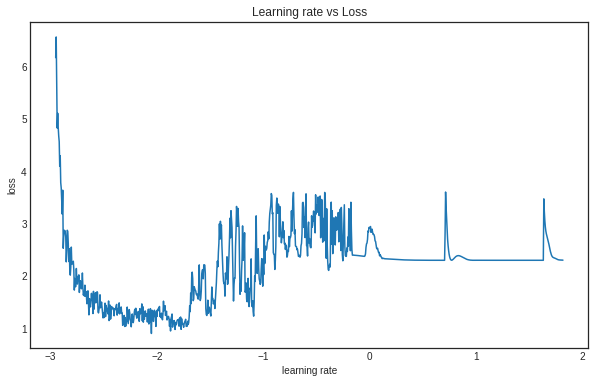

In [0]:
currentDT = datetime.datetime.now()
print("Current time:", currentDT)
lr_finder.plot_schedule(clip_beginning=10, clip_endding=5)

Current time: 2019-07-26 15:52:33.758463


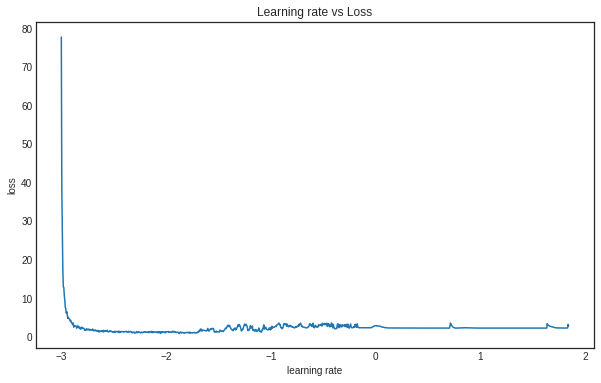

In [0]:
currentDT = datetime.datetime.now()
print("Current time:", currentDT)
lr_finder.plot_schedule_from_file('/content/gdrive/My Drive/ModelWeightsBackup/')

**Observations from above Learning Rate Graph**
- Min LR 1e-3
- Max LR 1e-2

Thumb rule is that ** Minimum is 10x smaller than the max found above**

### Functions for finding monetum ranges

In [0]:
MOMENTUMS = [0.9, 0.95, 0.99]


In [0]:
    momen_lr_finder = LRFinder(num_samples, batch_size, minimum_lr=0.001, maximum_lr=0.01,
                         validation_data=(test_features, test_labels),
                         validation_sample_rate=5,
                         lr_scale='linear', save_dir='/content/gdrive/My Drive/ModelWeightsBackup/momentum/momentum-%s/' % str(MOMENTUMS),
                         verbose=True)

In [0]:
#     # lr doesnt matter as it will be over written by the callback
sgd = SGD(lr=0.002, momentum=MOMENTUMS, nesterov=True)

In [0]:
modelmod.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-26 15:52:34.256558


In [0]:
filepathx ='/content/gdrive/My Drive/ModelWeightsBackup/eva_assignment_12_One_Cycle_LR_Mom.hdf5'

currentDT = datetime.datetime.now()
print("Current time:", currentDT)

callbackscustomx = [ModelCheckpoint(filepathx, monitor='val_acc', verbose=1, save_best_only=False)]


# callbackscustomx = [history,
#              ModelCheckpoint(filepathx, monitor='val_acc', verbose=1, save_best_only=True)]

currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-26 15:52:34.287387
Current time: 2019-07-26 15:52:34.288982


#### Findng optimal momentum based on earlier found LR

In [0]:
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

# for momentum in MOMENTUMS:
for momentum in MOMENTUMS:
  
  
  print("Momentum Value:",momentum)
  print("\n")
  momen_lr_finder = LRFinder(num_samples, batch_size, minimum_lr=0.001, maximum_lr=0.01,
                             validation_data=(test_features, test_labels),
                             validation_sample_rate=5,
                             lr_scale='linear', save_dir='/content/gdrive/My Drive/ModelWeightsBackup/momentum/momentum-%s/' % str(momentum),
                             verbose=True)
    
  # lr doesnt matter as it will be over written by the callback
  sgd = SGD(lr=0.002, momentum=momentum, nesterov=True)
  
  modelmod.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  
  modelmod.load_weights('/content/gdrive/My Drive/ModelWeightsBackup/eva_assignment_12_One_Cycle_LR.hdf5')

  callbackscustomx = [momen_lr_finder,ModelCheckpoint(filepathx, monitor='val_acc', verbose=1, save_best_only=False)]

  model1Details = modelmod.fit_generator(Customdatagen.flow(train_features, train_labels, batch_size=batch_size),
                                       steps_per_epoch=80, #len(train_features) / 32,
                                       epochs=nb_epoch,
                                       verbose=1,
                                       shuffle=False,
                                       callbacks=callbackscustomx,
                                       validation_data=(test_features, test_labels)
                                       )
                                                
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-26 15:52:34.327998
Momentum Value: 0.9


Epoch 1/1
79/80 [============================>.] - ETA: 1s - loss: 140.7441 - acc: 0.1017 - LRFinder: val_loss: 139.7446 - lr = 0.00823711 
 - LRFinder: val_loss: 139.7240 - lr = 0.00832990 
80/80 [==============================] - 84s 1s/step - loss: 140.7376 - acc: 0.1019 - val_loss: 139.7240 - val_acc: 0.1000
	LR Finder : Saved the losses and learning rate values in path : {/content/gdrive/My Drive/ModelWeightsBackup/momentum/momentum-0.9/}

Epoch 00001: saving model to /content/gdrive/My Drive/ModelWeightsBackup/eva_assignment_12_One_Cycle_LR_Mom.hdf5
Momentum Value: 0.95


Epoch 1/1
79/80 [============================>.] - ETA: 1s - loss: 140.5968 - acc: 0.1004 - LRFinder: val_loss: 139.2338 - lr = 0.00823711 
 - LRFinder: val_loss: 139.1977 - lr = 0.00832990 
80/80 [==============================] - 83s 1s/step - loss: 140.5866 - acc: 0.1004 - val_loss: 139.1977 - val_acc: 0.1000
	LR Finder : Saved the losses and lear

from plot we see, the model isnt impacted by the weight_decay very much at all

Current time: 2019-07-26 15:57:48.707095


Text(0.5, 1.0, 'Momentum')

Text(0.5, 0, 'Learning rate')

Text(0, 0.5, 'Validation Loss')

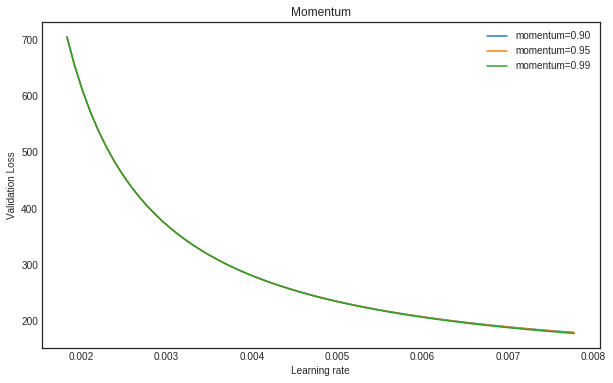

In [0]:
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

for momentum in MOMENTUMS:
    directory = '/content/gdrive/My Drive/ModelWeightsBackup/momentum/momentum-%s/' % str(momentum)

    losses, lrs = LRFinder.restore_schedule_from_dir(directory, 10, 5)
    plt.plot(lrs, losses, label='momentum=%0.2f' % momentum)

plt.title("Momentum")
plt.xlabel("Learning rate")
plt.ylabel("Validation Loss")
plt.legend()
plt.show()


**From plot we see, the model isnt impacted by the weight_decay very much at all. so we can use any of them.**

#### Findng optimal Weight Decay based on earlier found LR

In [0]:
# FINEGRAINED WEIGHT DECAY FACTORS
WEIGHT_DECAY_FACTORS = [1e-7, 3e-7, 3e-6]


currentDT = datetime.datetime.now()
print("Current time:", currentDT)

# for momentum in MOMENTUMS:
for weight_decay in WEIGHT_DECAY_FACTORS:
  
  
  print("Weight Decay Value:",weight_decay)
  print("\n")
  weight_lr_finder = LRFinder(num_samples, batch_size, minimum_lr=0.001, maximum_lr=0.01,
                             validation_data=(test_features, test_labels),
                             validation_sample_rate=5,
                             lr_scale='linear', save_dir='/content/gdrive/My Drive/ModelWeightsBackup/weight_decay/weight_decay-%s/' % str(weight_decay),
                             verbose=True)
    
  # lr doesnt matter as it will be over written by the callback
  sgd = SGD(lr=0.002, momentum=0.9, decay=weight_decay, nesterov=True)
  
  modelmod.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  
  modelmod.load_weights('/content/gdrive/My Drive/ModelWeightsBackup/eva_assignment_12_One_Cycle_LR.hdf5')

  callbackscustomx = [weight_lr_finder,ModelCheckpoint(filepathx, monitor='val_acc', verbose=1, save_best_only=False)]

  model1Details = modelmod.fit_generator(Customdatagen.flow(train_features, train_labels, batch_size=batch_size),
                                       steps_per_epoch=80, #len(train_features) / 32,
                                       epochs=nb_epoch,
                                       verbose=1,
                                       shuffle=False,
                                       callbacks=callbackscustomx,
                                       validation_data=(test_features, test_labels)
                                       )
                                                
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-26 15:59:08.662042
Weight Decay Value: 1e-07


Epoch 1/1
79/80 [============================>.] - ETA: 1s - loss: 140.7488 - acc: 0.1012 - LRFinder: val_loss: 139.7446 - lr = 0.00823711 
 - LRFinder: val_loss: 139.7240 - lr = 0.00832990 
80/80 [==============================] - 85s 1s/step - loss: 140.7435 - acc: 0.1009 - val_loss: 139.7240 - val_acc: 0.1000
	LR Finder : Saved the losses and learning rate values in path : {/content/gdrive/My Drive/ModelWeightsBackup/weight_decay/weight_decay-1e-07/}

Epoch 00001: saving model to /content/gdrive/My Drive/ModelWeightsBackup/eva_assignment_12_One_Cycle_LR_Mom.hdf5
Weight Decay Value: 3e-07


Epoch 1/1
79/80 [============================>.] - ETA: 1s - loss: 140.7359 - acc: 0.0999 - LRFinder: val_loss: 139.7446 - lr = 0.00823711 
 - LRFinder: val_loss: 139.7240 - lr = 0.00832990 
80/80 [==============================] - 86s 1s/step - loss: 140.7297 - acc: 0.0994 - val_loss: 139.7240 - val_acc: 0.1000
	LR Finder : Save

Text(0.5, 1.0, 'Weight Decay')

Text(0.5, 0, 'Learning rate')

Text(0, 0.5, 'Validation Loss')

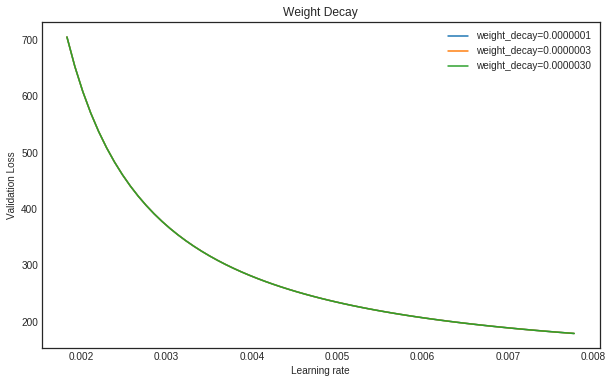

In [0]:
for weight_decay in WEIGHT_DECAY_FACTORS:
    directory = '/content/gdrive/My Drive/ModelWeightsBackup/weight_decay/weight_decay-%s/' % str(weight_decay)

    losses, lrs = LRFinder.restore_schedule_from_dir(directory, 10, 5)
    plt.plot(lrs, losses, label='weight_decay=%0.7f' % weight_decay)

plt.title("Weight Decay")
plt.xlabel("Learning rate")
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

**From plot we see, the model isnt impacted by the weight_decay very much at all. So we can use any of them.**

### Training with OneCycleLR

Once we find the maximum learning rate, we can then move onto using the OneCycleLR callback with SGD to train our model.

In [0]:
!ls -ltr
os.chdir('/content/')

total 16
drwxr-xr-x 1 root root 4096 Jul 19 16:14 sample_data
drwxr-xr-x 4 root root 4096 Jul 26 11:11 cutout-random-erasing
drwx------ 3 root root 4096 Jul 26 11:12 gdrive
drwxr-xr-x 5 root root 4096 Jul 26 12:56 keras-one-cycle


In [0]:
# !rm -rf keras-one-cycle
# !rm -rf clr.py
# # !rm -rf __pycache__

In [0]:
# !ls -ltr
# os.chdir('/content/')

In [0]:
# !git clone https://github.com/amitkayal/keras-one-cycle.git
# !ls -ltr
# !pwd

# import os

In [0]:
!pwd

/content


In [0]:
# os.chdir('/content/keras-one-cycle')

# from clr import LRFinder
# from clr import OneCycleLR
# # !cd


# from clr import OneCycleLR
# os.chdir('/content/')

In [0]:
from clr import OneCycleLR

In [0]:
train_features.shape[0]

50000

In [0]:
max_lr=0.02  ## This is taken from LR Finder
epoch = 50

num_samples = train_features.shape[0]
num_epoch = 50  #@param {type:"slider", min:0, max:100, step:1}
end_percentage =0.1
scale_percentage = None
maximum_momentum=0.99 #@param ["0.9", "0.95", "0.975"] {type:"raw"}
minimum_momentum=0.9 #@param ["0.9", "0.95", "0.975"] {type:"raw"}
# batch_size = '512'
batch_size= 64 #@param ["512", "256", "128", "64"] {type:"raw"}

In [0]:
!nvidia-smi

Fri Jul 26 13:14:06 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    55W / 149W |   3559MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

- This callback implements a cyclical learning rate policy (CLR). This is a special case of Cyclic Learning Rates, where we have only 1 cycle. After the completion of 1 cycle, the learning rate will decrease rapidly to 100th its initial lowest value

**Arguments**
- max_lr: Float. Initial learning rate. This also sets the starting learning rate (which will be 10x smaller than this), and will increase to this value during the first cycle.
- end_percentage: Float. The percentage of all the epochs of training that will be dedicated to sharply decreasing the learning rate after the completion of 1 cycle. Must be between 0 and 1.
- scale_percentage: Float or None. If float, must be between 0 and 1. If None, it will compute the scale_percentage automatically based on the `end_percentage`.
- maximum_momentum: Optional. Sets the maximum momentum (initial) value, which gradually drops to its lowest value in half-cycle, then gradually increases again to stay constant at this max value. Can only be used with SGD Optimizer.
- minimum_momentum: Optional. Sets the minimum momentum at the end of the half-cycle. Can only be used with SGD Optimizer.
- verbose: Bool. Whether to print the current learning rate after every epoch.

In [0]:
# lr_manager = OneCycleLR(num_samples, num_epoch, batch_size, max_lr,
#                         end_percentage,scale_percentage,
#                         maximum_momentum,minimum_momentum)

# lr_manager = OneCycleLR(num_samples, str(batch_size),max_lr,end_percentage,
#                        scale_percentage,maximum_momentum,
#                        minimum_momentum,verbose=True)

lr_manager = OneCycleLR(num_samples=num_samples, batchsize=batch_size, max_lr=max_lr, maximum_momentum=0.9, verbose=False)


currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-26 14:25:39.561997


In [0]:
# Compile the model here learning rate wil be overridden by call back latyer
# optimizer = sgd()
# sgd = optimizers.SGD(lr=0.01, momentum=0.9) 
sgd = SGD(lr=0.002, momentum=0.9, nesterov=True)

modelmod.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-26 14:25:42.274688


In [0]:
filepathx ='/content/gdrive/My Drive/ModelWeightsBackup/eva_assignment_12_One_Cycle_LR_Fnl.hdf5'

currentDT = datetime.datetime.now()
print("Current time:", currentDT)

callbackscustomx = [lr_manager,
             ModelCheckpoint(filepathx, monitor='val_acc', verbose=1, save_best_only=True)]


# callbackscustomx = [ModelCheckpoint(filepathx, monitor='val_acc', verbose=1, save_best_only=True)]
# callbackscustomx = [history,
#              ModelCheckpoint(filepathx, monitor='val_acc', verbose=1, save_best_only=True)]

currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-26 14:25:45.443554
Current time: 2019-07-26 14:25:45.444173


In [0]:
train_features.shape[0] // batch_size

781

In [0]:
# https://github.com/amitkayal/keras-one-cycle

In [0]:
#   batch_size= 64
#   modelCLR = modelmod.fit_generator(Customdatagen.flow(train_features, train_labels, batch_size=batch_size),
#                                        steps_per_epoch=train_features.shape[0] // batch_size,
#                                        epochs=epoch,
#                                        verbose=1,
#                                        shuffle=False,
#                                        callbacks=callbackscustomx,
#                                        validation_data=(test_features, test_labels)
#                                        )
  
modelCLR = modelmod.fit_generator(Customdatagen.flow(train_features, train_labels, batch_size=batch_size),
                                  steps_per_epoch=train_features.shape[0] // batch_size,
                                  epochs=epoch,
                                  verbose=1,
                                  shuffle=False,
                                  callbacks=callbackscustomx,
                                  validation_data=(test_features, test_labels)
                                  )
    

Class: <clr.OneCycleLR object at 0x7fa0c041acc0>
Values: {'validation_data': None, 'model': <keras.engine.training.Model object at 0x7fa0c1f5c860>, 'initial_lr': 0.02, 'end_percentage': 0.1, 'scale': 0.1, 'max_momentum': 0.9, 'min_momentum': 0.85, 'verbose': False, '_update_momentum': True, 'clr_iterations': 0.0, 'history': {}, 'epochs': None, 'batch_size': 64, 'samples': 50000, 'steps': None, 'num_iterations': None, 'mid_cycle_id': None, 'params': {'epochs': 50, 'steps': 781, 'verbose': 1, 'do_validation': True, 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}}


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:651: DeprecationWarning: `wait_time` is not used anymore.
  DeprecationWarning)


Epoch 1/50
  3/781 [..............................] - ETA: 19:28 - loss: 2.1923 - acc: 0.2500

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.759085). Check your callbacks.
  % delta_t_median)


781/781 [==============================] - 82s 106ms/step - loss: 2.3217 - acc: 0.2149 - val_loss: 2.8800 - val_acc: 0.1126

Epoch 00001: val_acc improved from -inf to 0.11260, saving model to /content/gdrive/My Drive/ModelWeightsBackup/eva_assignment_12_One_Cycle_LR_Fnl.hdf5
Epoch 2/50
781/781 [==============================] - 76s 97ms/step - loss: 2.2225 - acc: 0.2529 - val_loss: 2.6837 - val_acc: 0.1766

Epoch 00002: val_acc improved from 0.11260 to 0.17660, saving model to /content/gdrive/My Drive/ModelWeightsBackup/eva_assignment_12_One_Cycle_LR_Fnl.hdf5
Epoch 3/50
781/781 [==============================] - 77s 98ms/step - loss: 2.1465 - acc: 0.2817 - val_loss: 2.0684 - val_acc: 0.3108

Epoch 00003: val_acc improved from 0.17660 to 0.31080, saving model to /content/gdrive/My Drive/ModelWeightsBackup/eva_assignment_12_One_Cycle_LR_Fnl.hdf5
Epoch 4/50
781/781 [==============================] - 76s 98ms/step - loss: 2.0949 - acc: 0.2974 - val_loss: 1.9714 - val_acc: 0.3445

Epoch 00

## Model Evaluation

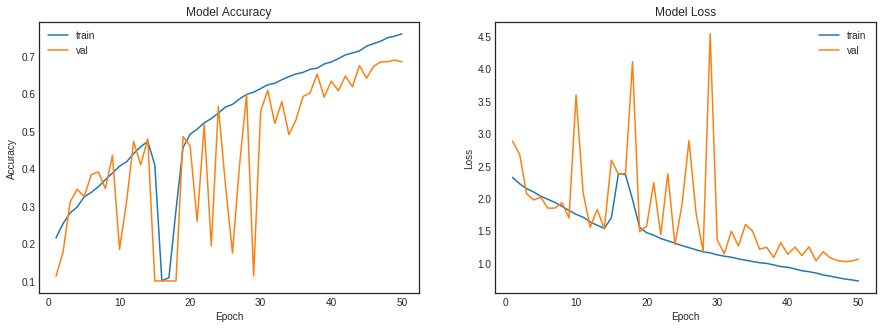

Accuracy on test data is: 68.49


In [0]:
# plot model history
plot_model_history(modelCLR)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, modelmod))

In [0]:
final_loss, final_acc = modelmod.evaluate(test_features, test_labels, verbose=1)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

10000/10000 [==============================] - 5s 540us/step
Final loss: 1.056984, final accuracy: 0.684900
Current time: 2019-07-26 15:30:53.589679


In [0]:
Y_pred = modelmod.predict(test_features)
CFMatrix = show_classification_matrix(Y_pred,test_labels)
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Confusion matrix:
[[729  17  46   9  24   4  22  11  92  46]
 [ 21 817   5   9   5   1  18   4  20 100]
 [ 56   5 571  50  93  44 109  34  23  15]
 [ 18  10 101 397  80 142 169  37  17  29]
 [ 25   9  78  34 642  17 111  58  14  12]
 [  9   8  63 163  59 530  83  47  16  22]
 [  7  14  36  32  34   9 853   3   4   8]
 [ 16   5  34  42  88  61  26 692   1  35]
 [ 64  36  12  10   9   4  11   0 829  25]
 [ 28  90   5   8  12   3  22   9  34 789]]
Current time: 2019-07-26 15:30:58.039999


<Figure size 720x432 with 0 Axes>

Confusion matrix, without normalization
[[729  17  46   9  24   4  22  11  92  46]
 [ 21 817   5   9   5   1  18   4  20 100]
 [ 56   5 571  50  93  44 109  34  23  15]
 [ 18  10 101 397  80 142 169  37  17  29]
 [ 25   9  78  34 642  17 111  58  14  12]
 [  9   8  63 163  59 530  83  47  16  22]
 [  7  14  36  32  34   9 853   3   4   8]
 [ 16   5  34  42  88  61  26 692   1  35]
 [ 64  36  12  10   9   4  11   0 829  25]
 [ 28  90   5   8  12   3  22   9  34 789]]


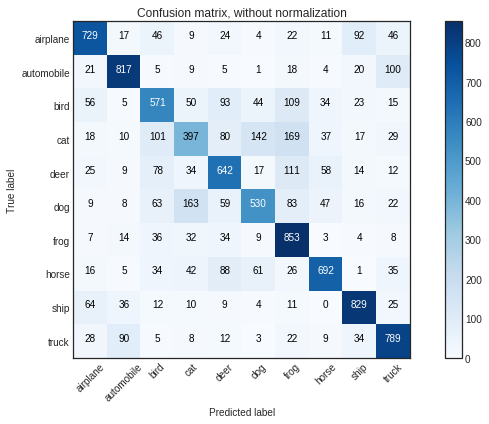

In [0]:
# Names of predicted classes
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(CFMatrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

## Filtering our misclassified images

Aim of this section is to find out top 25 misclassified images.

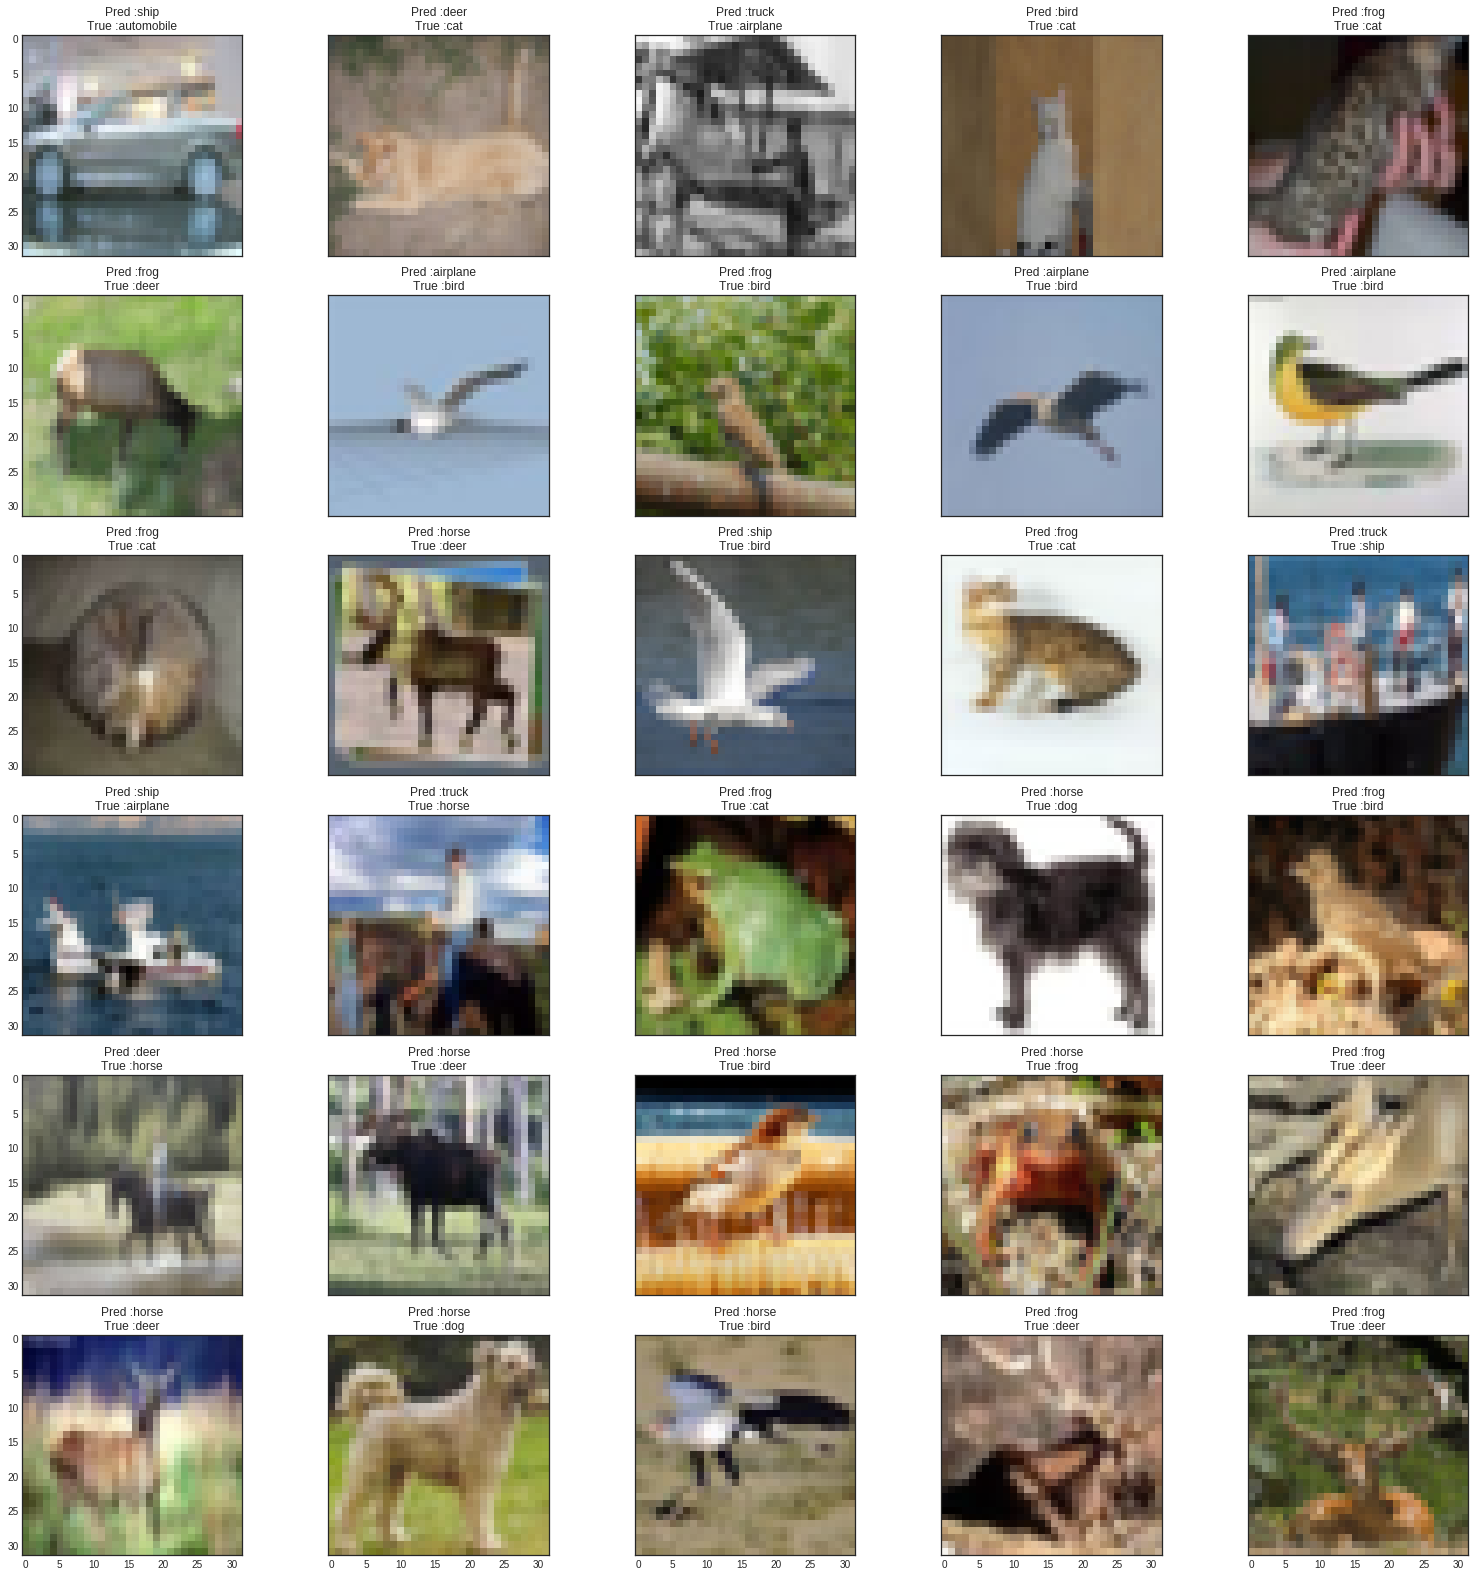

In [0]:
show_misclassified_images(Y_pred=Y_pred,Y_true_nor=test_labels,X_test=test_features)

ValueError: ignored

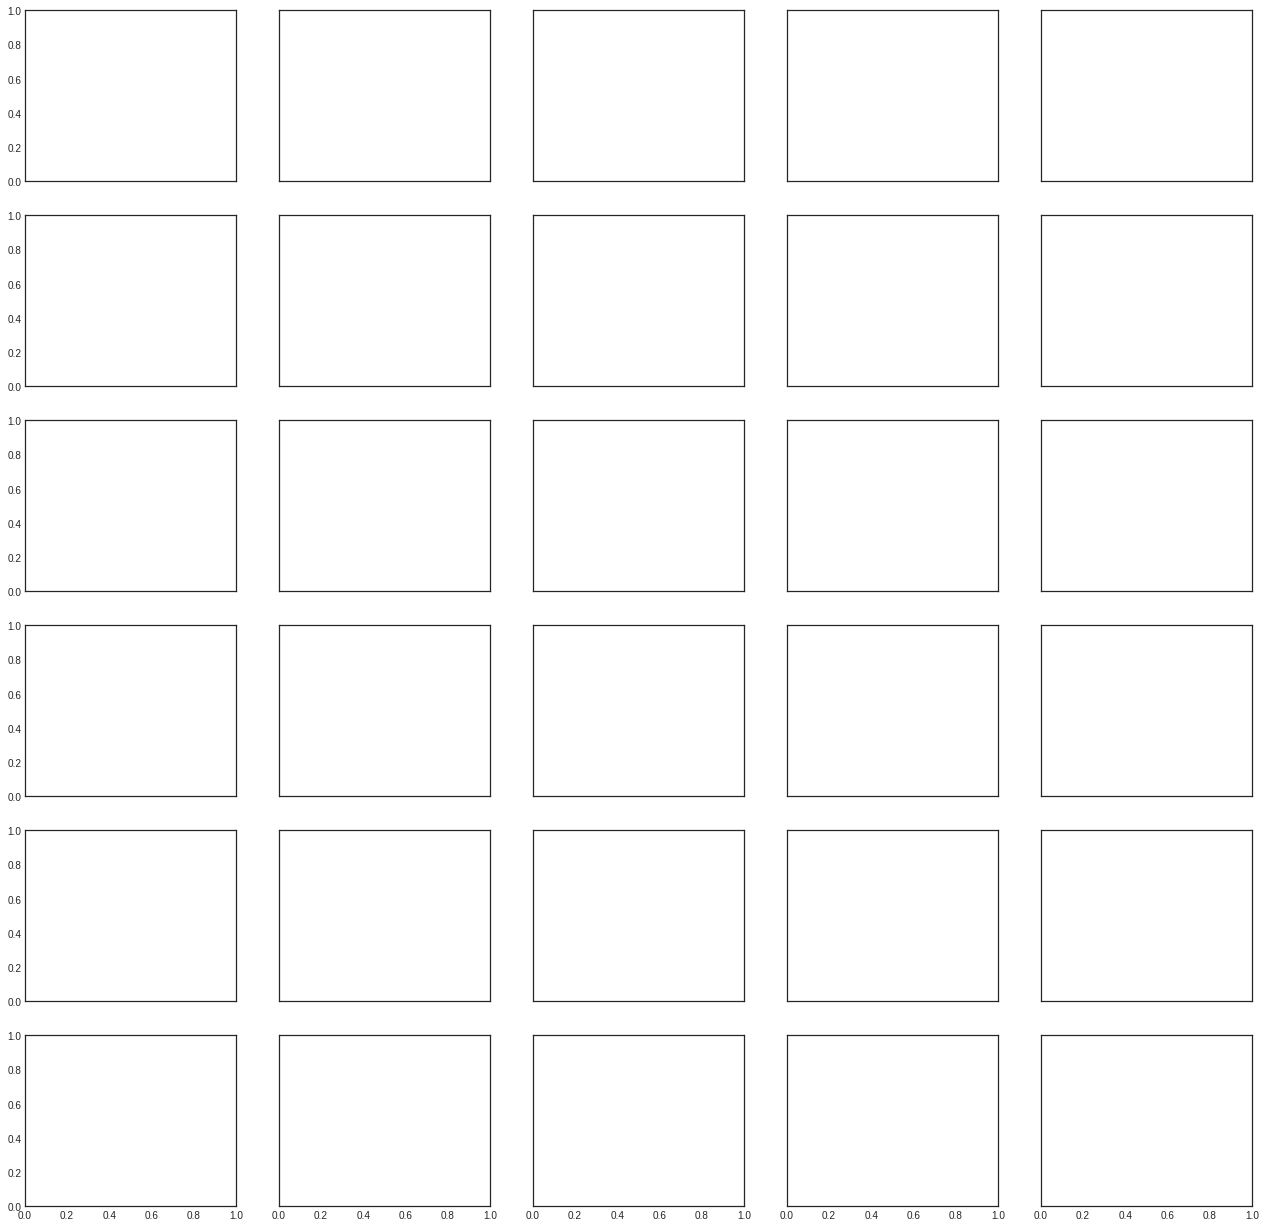

In [0]:
show_misclassified_gradcam_heatmap_images(Y_pred=Y_pred,Y_true_nor=test_labels,X_test=test_features)